## 03) 빈도분석

### 1) 빈도분석 - nltk & wordcloud

In [18]:
input_file_name = "data/BVL_v2.pk"
with open(input_file_name, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df = pickle.load(f)
    df = df[df['year']!=2019]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354 entries, 0 to 3353
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      3354 non-null   object        
 1   article_type     3354 non-null   object        
 2   article_titles   3354 non-null   object        
 3   nick_names       3354 non-null   object        
 4   dates            3354 non-null   object        
 5   num_views        3354 non-null   int32         
 6   article_content  3354 non-null   object        
 7   num_comment      3354 non-null   int64         
 8   comment_list     3354 non-null   object        
 9   new_dates        3354 non-null   datetime64[ns]
 10  year             3354 non-null   int64         
 11  month            3354 non-null   int64         
 12  day              3354 non-null   int64         
 13  weekday          3354 non-null   int64         
 14  nouns_title      3354 non-null   object 

In [76]:
tokens = [t for d in df['nouns_document'] for t in d]
print(len(tokens))
print(len(set(tokens))) #고유값 개수
corpus = nltk.Text(tokens) #말뭉치로 묶는다
freq = nltk.FreqDist(corpus) #corpus.vocab().most_common(10) : 비슷한 기능으로 vocab() 메서드 있음
freq.most_common(50)

284474
15740


[('반클리프', 8884),
 ('목걸이', 6138),
 ('팔찌', 3850),
 ('빈티지', 3456),
 ('다이아', 3180),
 ('스윗', 3095),
 ('자개', 2833),
 ('귀걸이', 2445),
 ('착용', 2265),
 ('사이즈', 2260),
 ('추천', 2180),
 ('데일리', 2128),
 ('반지', 2088),
 ('불가리', 2085),
 ('매장', 2053),
 ('오닉스', 2003),
 ('구매', 1840),
 ('기요세', 1751),
 ('가격', 1624),
 ('느낌', 1540),
 ('티파니', 1466),
 ('까르띠에', 1451),
 ('시계', 1422),
 ('샤넬', 1392),
 ('로즈골드', 1390),
 ('주얼리', 1372),
 ('가방', 1313),
 ('러브', 1308),
 ('커넬리언', 1274),
 ('모티브', 1186),
 ('줄', 1115),
 ('디바스드림', 1086),
 ('옐로골드', 1026),
 ('미니', 986),
 ('연장', 945),
 ('비제로원', 905),
 ('화이트골드', 887),
 ('셀러', 839),
 ('요즘', 820),
 ('레이어드', 809),
 ('알함브라', 804),
 ('인상', 749),
 ('브랜드', 705),
 ('체인', 692),
 ('골드', 677),
 ('링', 656),
 ('쎄뻥', 655),
 ('선물', 653),
 ('존재', 652),
 ('영롱', 652)]

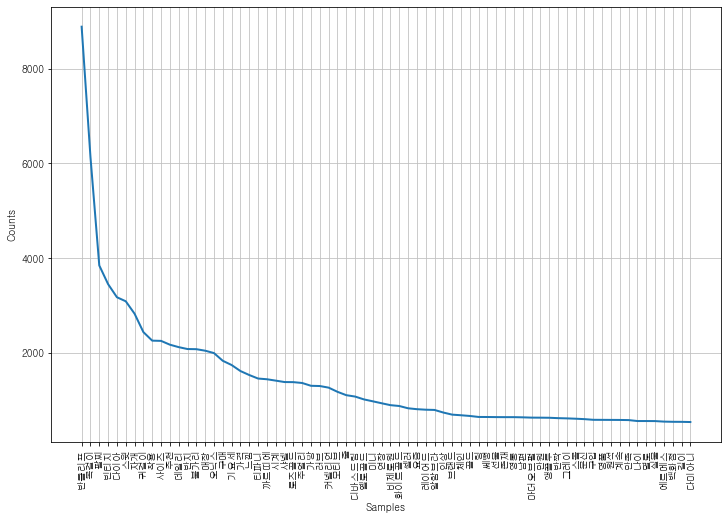

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [77]:
plt.figure(figsize=(12,8))
freq.plot(70)

In [52]:
from wordcloud import WordCloud
# from imageio import imread #PIL하고 이거 두개 중 하나만 사용하면됨
from PIL import Image #워드클라우드 배경이미지 다른걸로 할때 필요
from itertools import repeat

In [53]:
kor_lst = ['목걸이', '비제로원', '다이아', '반지', '반클리프', '팔찌', '디바스드림', '미니', '추천', '착용', '데일리', '매장', '까르띠에', '사이즈', '가격', '구매', '시계', \
           '티파니', '로즈골드', '주얼리', '느낌', '자개', '샤넬', '가방', '링', '파베', '귀걸이', '인상', '줄', '브랜드', '러브', '밴드', '요즘', '기본', '부쉐론', '존재', '만원', '옐로골드', '빈티지', '남편', '셀러', '화이트골드']
eng_lst = ['necklace', 'BZero1', 'diamond', 'ring', 'VCA', 'bracelet', "Divas'Dream", 'Mini', 'recommend', 'wear', 'daily', 'boutique', 'Cartier', 'size', 'price', 'purchase', 'watch', \
           'Tiffany', 'rosegold', 'jewelry', 'feel', 'pearl', 'Chanel', 'bag', 'ring', 'pave', 'earring', 'increase', 'chain', 'brand', 'Love', 'band', 'nowdays', 'basic', 'Boucheron', 'eye-catching', 'price range', 'yellowgold', 'Vintage', 'husband', 'seller', 'whitegold']
print(len(kor_lst))
print(len(eng_lst))

42
42


In [54]:
words = []
for index, tup in enumerate(freq.most_common(200)): #index 와 값을 동시에 순회하는 방법
    words.extend(repeat(tup[0], round(tup[1]/10))) # extend: iterable 객체(리스트, 튜플, 딕셔너리 등)의 엘레멘트를 list에 appending #repeat(x,y) x를 y번 반복

In [55]:
# 영어변환
for word_idx in range(len(words)):
    for idx in range(len(kor_lst)):
        if words[word_idx] == kor_lst[idx]:
            words[word_idx] = eng_lst[idx]

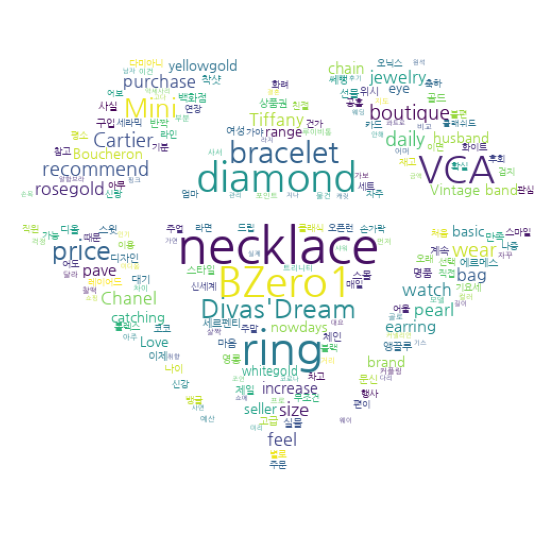

In [62]:
icon = Image.open("diamond_v1.png").convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255)) #배경 하얀색 255로 만들어주어야 함
mask.paste(icon,icon)
mask = np.array(mask)
# mask=np.array(Image.open("Diamond.png"))
font_path = "c:/Windows/Fonts/NanumGothic.ttf"

text = ','.join(words)
wc_stop = ['불가리'] #브랜드 키워드 추출시에 브랜드명 뺄것

wc = WordCloud(background_color="white", 
               font_path = font_path, #폰트 설정
               width=500, height=250,
               max_words=200,
               max_font_size=100, 
               mask=mask, 
               prefer_horizontal=1, #The ratio of times to try horizontal fitting as opposed to vertical
               random_state = 0, #0: 글자배치 코드 돌릴때마다 고정
               collocations = False,
              stopwords=wc_stop) #bigram 포함여부 # relative_scaling = 0.2 #relative_scaling = 0.2 높게 줄수록 큰건크게,작은건작게
wc.generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, cmap=plt.cm.Pastel1) #컬러맵
# plt.title("Frequency Analysis of Bulgari")
plt.axis("off") #워드크라우드는 축 제거
# plt.savefig("bulgari_v1_eng.png")

### 2) 빈도분석 - Countvectorizer / Tfidf

#### 1. 브랜드 df 합치기 
- 합친것은 타임라인(연월)별 countvectorizer 추출시 사용

In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk

In [1]:
import warnings # 경고 알림 제거
warnings.filterwarnings("ignore", category=Warning) # 경고 알림이 뜨면 모두 무시합니다.

In [2]:
# pandas 데이터프레임.iplot() 함수 호출 전에 로드해야 함
import chart_studio.plotly as py #chart_studio 는 plotly 로 작성된 그래프를 웹상에서 보여주기 위한 라이브러리
import cufflinks as cf #pandas로 그래프를 그리기 위한 기능을 plotly 와 연결시키기 위한 라이브러리
cf.go_offline(connected=True)

import bar_chart_race as bcr
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Gulim'
mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #.0f: 소수점 자리수 지정
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_colwidth', None) #default 50

In [70]:
with open("data/BVL_v2.pk", 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df_b = pickle.load(f)
    df_b = df_b[df_b['year']!=2019] #불가리만 DTM때문에 2019년 추출해서 2019년 제외한 df으로 수정

with open("data/CARTIER_v2.pk", 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df_c = pickle.load(f)

with open("data/TIFFANY_v2.pk", 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df_t = pickle.load(f)

with open("data/VCA_v2.pk", 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df_v = pickle.load(f)

In [71]:
df_b['brand'] = 'bulgari'
df_c['brand'] = 'cartier'
df_t['brand'] = 'tiffany'
df_v['brand'] = 'vca'

In [72]:
df = pd.concat([df_b, df_c, df_t, df_v], axis=0, ignore_index=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18436 entries, 0 to 18435
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      18436 non-null  object        
 1   article_type     18436 non-null  object        
 2   article_titles   18436 non-null  object        
 3   nick_names       18436 non-null  object        
 4   dates            18436 non-null  object        
 5   num_views        18436 non-null  int32         
 6   article_content  18436 non-null  object        
 7   num_comment      18436 non-null  int64         
 8   comment_list     18436 non-null  object        
 9   new_dates        18436 non-null  datetime64[ns]
 10  year             18436 non-null  int64         
 11  month            18436 non-null  int64         
 12  day              18436 non-null  int64         
 13  weekday          18436 non-null  int64         
 14  nouns_title      18436 non-null  objec

In [8]:
df.groupby('brand').size()

brand
bulgari    3354
cartier    7523
tiffany    3767
vca        3792
dtype: int64

In [9]:
save_excel_name = 'data/BCTV_v2.xlsx'
df.to_excel(save_excel_name, index=False) # 읽기용으로 엑셀 저장하고, 전처리 등 형태소분석 할때는 피클로 저장하고

In [10]:
#pickle: 저장된 list그자체로 저장해서 list를 그 자체로 가져오기위하여
save_file_name = "data/BCTV_v2.pk"
with open(save_file_name, "wb") as f: #wb: write binary
    pickle.dump(df, f)

#### 2. 빈도분석 - CountVectorizer

In [12]:
tokens_b = [t for d in df_b['nouns_document'] for t in d]
tokens_c = [t for d in df_c['nouns_document'] for t in d]
tokens_t = [t for d in df_t['nouns_document'] for t in d]
tokens_v = [t for d in df_v['nouns_document'] for t in d]

In [13]:
vectorizer = CountVectorizer()
corp = [
     ' '.join(tokens_b),
    ' '.join(tokens_c),
      ' '.join(tokens_t),
      ' '.join(tokens_v),
]
X = vectorizer.fit_transform(corp) #X.shape: (4,30157) 문서수가 행,단어가 열

df_cv = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_cv = df_cv.T
df_cv.columns = ['Bulgari', 'Cartier','Tiffany', 'VCA']

In [17]:
df_cv.sort_values('Bulgari', ascending=False)[:10]

,Bulgari,Cartier,Tiffany,VCA
불가리,8228,2384,1529,2085
목걸이,4870,3673,4691,6138
비제로원,3234,912,650,905
다이아,3066,6176,4358,3180
반지,2695,4387,3487,2088
반클리프,2675,2452,2074,8884
팔찌,2502,5801,3292,3850
디바스드림,2312,325,339,1086
미니,2079,1187,1083,986
추천,2066,4284,2239,2180


In [18]:
df_cv.to_excel('CountVectorizer_BCTV.xlsx') #키워드가 인덱스되어 index=False 사용안함

#### 3. TF-IDF
- 여기서 document는 각각의 brand가 됨. document수가 높을수록 값이 유의미함(document 수가 적으면, idf영향력이 적어 tf와 큰 차이가 안날수가 있음)

In [19]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corp)

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names())
df_tfidf = df_tfidf.T
df_tfidf.columns = ['Bulgari', 'Cartier','Tiffany', 'VCA']

In [21]:
df_tfidf.sort_values('Bulgari', ascending=False)[:20]

,Bulgari,Cartier,Tiffany,VCA
불가리,0.552,0.082,0.103,0.123
목걸이,0.327,0.126,0.316,0.361
비제로원,0.217,0.031,0.044,0.053
다이아,0.206,0.212,0.294,0.187
반지,0.181,0.151,0.235,0.123
반클리프,0.179,0.084,0.140,0.523
팔찌,0.168,0.199,0.222,0.226
디바스드림,0.155,0.011,0.023,0.064
미니,0.139,0.041,0.073,0.058
추천,0.139,0.147,0.151,0.128


In [22]:
df_tfidf.to_excel('tfidf_BCTV.xlsx')

### 3) 시각화

#### 1. 타임라인(연월)별 브랜드별 전체 언급량 변화 - Line Graph / Bar Chart Race

In [32]:
input_file_name = "data/BCTV_v2.pk"
with open(input_file_name, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df = pickle.load(f)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18436 entries, 0 to 18435
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      18436 non-null  object        
 1   article_type     18436 non-null  object        
 2   article_titles   18436 non-null  object        
 3   nick_names       18436 non-null  object        
 4   dates            18436 non-null  object        
 5   num_views        18436 non-null  int32         
 6   article_content  18436 non-null  object        
 7   num_comment      18436 non-null  int64         
 8   comment_list     18436 non-null  object        
 9   new_dates        18436 non-null  datetime64[ns]
 10  year             18436 non-null  int64         
 11  month            18436 non-null  int64         
 12  day              18436 non-null  int64         
 13  weekday          18436 non-null  int64         
 14  nouns_title      18436 non-null  objec

In [34]:
# df['date_ym'] = df['new_dates'].dt.to_period(freq='M') #barchartrace는 datetime index로 해야함

df['date_ym'] = df['new_dates'].dt.strftime('%Y-%m')
df['date_ym'] = pd.to_datetime(df['date_ym'])

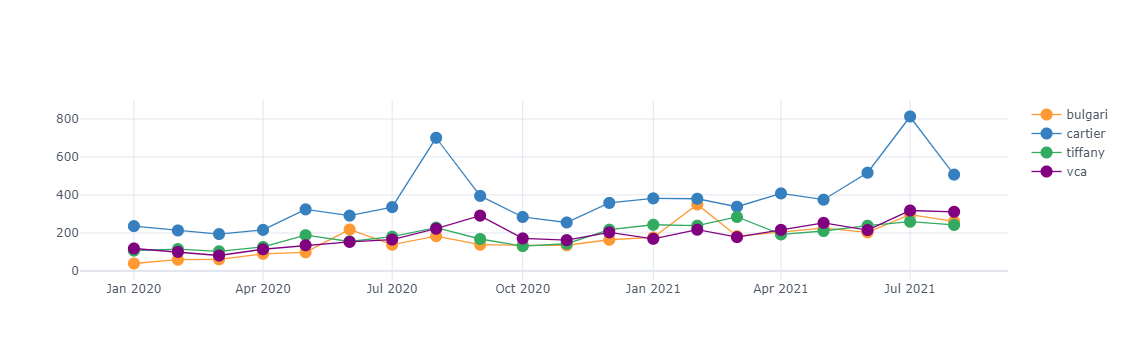

In [35]:
# annotations={'2020-06':'B-zero1 necklace','2021-02':'TBD'}
df.groupby(['date_ym', 'brand']).size().unstack().iplot(kind='scatter', mode='lines+markers', theme='white')

In [37]:
# df_trend = df.groupby(['brand','date_ym']).size().unstack()
# df_trend.to_excel('df_trend.xlsx')

In [15]:
race_t = df.groupby(['date_ym', 'brand']).size().unstack()

In [89]:
bcr.bar_chart_race(df = race_t, 
                   n_bars = 4, 
                   sort='desc',
                   steps_per_period=15,
                   period_length=1500,
                   figsize=(5, 3),
                   bar_label_size=6, tick_label_size=8,
                   interpolate_period=True,
                   period_fmt='%b, %Y',
                   cmap='accent',
#                    filter_column_colors=True,
#                    shared_fontdict={'family' : 'NanumMyeongjo', 'weight' : 'bold', 'color' : 'rebeccapurple'},
#                    title='Top 30 keyword since 2020 (Total)',
#                    title_size='smaller'
                   ) #, filename = 'Top 50 keyword since 2020 (Total).mp4'
# 강조하려는 키워드 bar색깔 달리할것

#### 2. 타임라인(연월)별 브랜드별 keyword Countvectorizer
> month별 count한 파일 만들어 BI로 분석

In [23]:
input_file_name = "data/BCTV_v2.pk"
with open(input_file_name, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df = pickle.load(f)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18436 entries, 0 to 18435
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      18436 non-null  object        
 1   article_type     18436 non-null  object        
 2   article_titles   18436 non-null  object        
 3   nick_names       18436 non-null  object        
 4   dates            18436 non-null  object        
 5   num_views        18436 non-null  int32         
 6   article_content  18436 non-null  object        
 7   num_comment      18436 non-null  int64         
 8   comment_list     18436 non-null  object        
 9   new_dates        18436 non-null  datetime64[ns]
 10  year             18436 non-null  int64         
 11  month            18436 non-null  int64         
 12  day              18436 non-null  int64         
 13  weekday          18436 non-null  int64         
 14  nouns_title      18436 non-null  objec

In [25]:
df.groupby('brand').size()

brand
bulgari    3354
cartier    7523
tiffany    3767
vca        3792
dtype: int64

In [26]:
df['date_ym'] = df['new_dates'].dt.strftime('%Y-%m')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18436 entries, 0 to 18435
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      18436 non-null  object        
 1   article_type     18436 non-null  object        
 2   article_titles   18436 non-null  object        
 3   nick_names       18436 non-null  object        
 4   dates            18436 non-null  object        
 5   num_views        18436 non-null  int32         
 6   article_content  18436 non-null  object        
 7   num_comment      18436 non-null  int64         
 8   comment_list     18436 non-null  object        
 9   new_dates        18436 non-null  datetime64[ns]
 10  year             18436 non-null  int64         
 11  month            18436 non-null  int64         
 12  day              18436 non-null  int64         
 13  weekday          18436 non-null  int64         
 14  nouns_title      18436 non-null  objec

In [28]:
def count_vect(a):
    df_b = a[a['brand']=='bulgari']
    df_c = a[a['brand']=='cartier']
    df_t = a[a['brand']=='tiffany']
    df_v = a[a['brand']=='vca']
    tokens_b = [t for d in df_b['nouns_document'] for t in d]
    tokens_c = [t for d in df_c['nouns_document'] for t in d]
    tokens_t = [t for d in df_t['nouns_document'] for t in d]
    tokens_v = [t for d in df_v['nouns_document'] for t in d]
    corp = [
         ' '.join(tokens_b),
        ' '.join(tokens_c),
          ' '.join(tokens_t),
          ' '.join(tokens_v),
    ]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corp)
    vt = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    vt_t = vt.T
    vt_t.columns = ['Bulgari', 'Cartier','Tiffany', 'VCA']
    return vt_t

In [30]:
%%time
lst = pd.period_range('2020-01-01','2021-08-31', freq='M').strftime('%Y-%m')
df_result = pd.DataFrame()

for l in lst:
    a = df[df['date_ym']==l]
    ym = count_vect(a)
    ym['date_ym'] = l
    df_result = pd.concat([df_result, ym], axis=0)

Wall time: 1.36 s


In [31]:
df_result.to_excel('CountVectorizer_BCTV_month.xlsx')

#### 3. 특정단어 브랜드별 Timeline별 빈도 비교 : 목걸이, 반지, 팔찌, 귀걸이

##### 3-1. 상대빈도 비교
- Family(목걸이, 반지, 팔찌, 귀걸이)별 Timeline별 **Keyword share 지표 생성하여 비교**
> Market Share와 유사한 방식으로 **특정 키워드 전체 언급량에서 brand별 언급 비중**을 본다

In [50]:
race = pd.read_excel('CountVectorizer_BCTV_month.xlsx')

In [51]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131091 entries, 0 to 131090
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  131091 non-null  object
 1   Bulgari     131091 non-null  int64 
 2   Cartier     131091 non-null  int64 
 3   Tiffany     131091 non-null  int64 
 4   VCA         131091 non-null  int64 
 5   date_ym     131091 non-null  object
dtypes: int64(4), object(2)
memory usage: 6.0+ MB


In [52]:
race['date_ym'] = pd.to_datetime(race['date_ym'])

In [53]:
race.rename({'Unnamed: 0': 'keyword'}, axis=1, inplace=True)

In [54]:
race.head()

,keyword,Bulgari,Cartier,Tiffany,VCA,date_ym
0,h아워,2,95,0,2,2020-01-01
1,가가,0,1,2,0,2020-01-01
2,가감,0,1,1,0,2020-01-01
3,가게,0,4,2,2,2020-01-01
4,가겠쥬,0,1,0,0,2020-01-01


In [55]:
race.loc[race[race['keyword']=='뱅글'].index, 'keyword'] = '팔찌' #팔찌 안에 뱅글 포함

In [56]:
race = race[['keyword', 'Bulgari', 'Cartier', 'Tiffany', 'VCA', 'date_ym']]
race.set_index('date_ym', inplace=True)
race['Total'] = race['Bulgari'] + race['Cartier'] + race['Tiffany'] + race['VCA']

In [57]:
race_key = race[(race['keyword']=='목걸이')|(race['keyword']=='반지')|(race['keyword']=='팔찌')\
                |(race['keyword']=='귀걸이')|(race['keyword']=='뱅글')]

In [58]:
race_key = race_key.groupby(['date_ym','keyword']).sum().reset_index().set_index('date_ym')

In [47]:
race_key['B_Mix'] = race_key['Bulgari']/race_key['Total'] * 100
race_key['C_Mix'] = race_key['Cartier']/race_key['Total'] * 100
race_key['T_Mix'] = race_key['Tiffany']/race_key['Total'] * 100
race_key['V_Mix'] = race_key['VCA']/race_key['Total'] * 100

In [48]:
race_key['Total_Mix'] = race_key['B_Mix'] + race_key['C_Mix'] + race_key['T_Mix'] + race_key['V_Mix']

In [49]:
race_key.head(20)

,keyword,Bulgari,Cartier,Tiffany,VCA,Total,B_Mix,C_Mix,T_Mix,V_Mix,Total_Mix
date_ym,,,,,,,,,,,
2020-01-01,귀걸이,10,16,29,61,116,8.621,13.793,25.000,52.586,100.000
2020-01-01,목걸이,35,63,114,170,382,9.162,16.492,29.843,44.503,100.000
2020-01-01,반지,46,145,126,80,397,11.587,36.524,31.738,20.151,100.000
2020-01-01,팔찌,29,200,54,147,430,6.744,46.512,12.558,34.186,100.000
2020-02-01,귀걸이,16,22,46,60,144,11.111,15.278,31.944,41.667,100.000
2020-02-01,목걸이,85,68,131,196,480,17.708,14.167,27.292,40.833,100.000
2020-02-01,반지,44,108,86,31,269,16.357,40.149,31.970,11.524,100.000
2020-02-01,팔찌,22,131,99,104,356,6.180,36.798,27.809,29.213,100.000
2020-03-01,귀걸이,39,16,41,65,161,24.224,9.938,25.466,40.373,100.000


###### 3-1-1. 특정 family의 Timeline별 Keyword share 비교 : 팔찌

In [18]:
race_mix = race_key[race_key['keyword']=='팔찌'][['B_Mix', 'C_Mix', 'T_Mix', 'V_Mix']]

In [19]:
race_mix

,B_Mix,C_Mix,T_Mix,V_Mix
date_ym,,,,
2020-01-01,6.744186,46.511628,12.558140,34.186047
2020-02-01,6.179775,36.797753,27.808989,29.213483
2020-03-01,8.641975,39.753086,22.222222,29.382716
2020-04-01,8.659794,36.082474,31.546392,23.711340
2020-05-01,11.030741,39.421338,32.368897,17.179024
2020-06-01,25.561798,29.915730,27.668539,16.853933
2020-07-01,9.036145,38.674699,29.156627,23.132530
2020-08-01,11.648746,45.519713,18.548387,24.283154
2020-09-01,10.224439,36.284289,19.576060,33.915212


In [21]:
race_mix.iplot(kind='scatter', mode='lines+markers')

###### 3-1-2. 특정 family의 Timeline별 Keyword share 비교 : 목걸이

In [22]:
race_mix = race_key[race_key['keyword']=='목걸이'][['B_Mix', 'C_Mix', 'T_Mix', 'V_Mix']]

In [23]:
race_mix

,B_Mix,C_Mix,T_Mix,V_Mix
date_ym,,,,
2020-01-01,9.162304,16.492147,29.842932,44.502618
2020-02-01,17.708333,14.166667,27.291667,40.833333
2020-03-01,15.681234,16.452442,31.105398,36.760925
2020-04-01,21.689060,17.082534,30.518234,30.710173
2020-05-01,17.747440,14.334471,39.249147,28.668942
2020-06-01,39.489796,15.612245,22.346939,22.551020
2020-07-01,22.249093,24.062878,24.788392,28.899637
2020-08-01,23.015873,24.603175,24.170274,28.210678
2020-09-01,22.150538,17.311828,22.795699,37.741935


In [24]:
race_mix.iplot(kind='scatter', mode='lines+markers')

##### 3-2. 절대빈도 비교

In [30]:
race_t = race_key[race_key['keyword']=='목걸이'][['Bulgari', 'Cartier', 'Tiffany', 'VCA']]

In [31]:
race_k = race_t.stack().reset_index()
race_w = race_k.groupby(['level_1', 'date_ym'])[0].sum().reset_index().pivot_table(values = 0, index='date_ym', columns='level_1', fill_value=0)

In [32]:
race_w.iplot(kind='scatter', mode='lines+markers')

##### 3-3. 특정 브랜드의 family별 언급량 추이

In [36]:
variable = 'Bulgari'
race_br = race_key[['keyword', variable]]
race_br = race_br.pivot_table(values = variable, index='date_ym', columns='keyword', fill_value=0)
race_br.head()

keyword,귀걸이,목걸이,반지,팔찌
date_ym,,,,
2020-01-01,10,35,46,29
2020-02-01,16,85,44,22
2020-03-01,39,61,89,35
2020-04-01,20,113,100,42
2020-05-01,23,104,92,61
